The head of the Police Department of Boston, who read your report for the Mayor's team, was extremely interested in the results. He contacted your consulting firm for an additional presentation, that would focus on the nature of crimes that take place in Boston, the potential time trends that you could identify and/or the heterogeneity of the impact of criminality on the different police districts. 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
%matplotlib inline

In [1]:
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


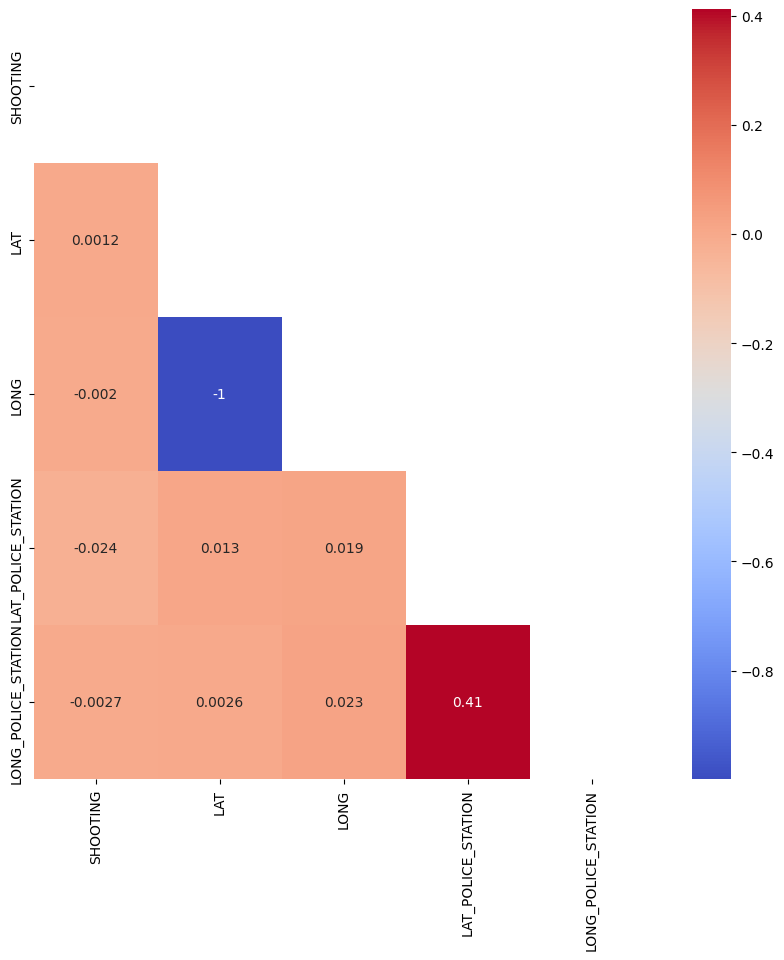

In [32]:
plt.figure(figsize=(10,10))

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, cmap="coolwarm", annot=True);

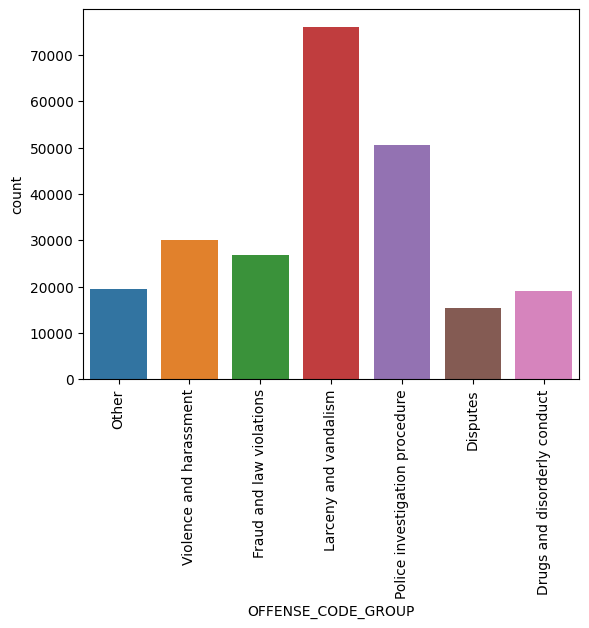

In [35]:
sns.countplot(x="OFFENSE_CODE_GROUP", data=data)
plt.xticks(rotation=90);

In [108]:
df = pd.DataFrame(data.groupby(by=["NAME","OFFENSE_CODE_GROUP"]).agg('count')).sort_values(["NAME", "INCIDENT_NUMBER"], ascending=[True,False])
df

INCIDENT_NUMBER  SHOOTING  \
NAME         OFFENSE_CODE_GROUP                                          
Brighton     Larceny and vandalism                      5274      5274   
             Police investigation procedure             2783      2783   
             Fraud and law violations                   1807      1807   
             Violence and harassment                    1627      1627   
             Other                                       925       925   
...                                                      ...       ...   
West Roxbury Fraud and law violations                   1168      1168   
             Violence and harassment                    1089      1089   
             Other                                       880       880   
             Drugs and disorderly conduct                721       721   
             Disputes                                    597       597   

                                             OCCURRED_ON_DATE   LAT  LONG  \
NAME         OFFENSE_CODE_GROUP                                             
Brighton     Larceny and vandalism                       5274  5274  5274   
             Police investigation procedure              2783  2783  2783   
             Fraud and law violations                    1807  1807  1807   
             Violence and harassment                     1627  1627  1627   
             Other                                        925   925   925   
...                                                       ...   ...   ...   
West Roxbury Fraud and law violations                    1168  1168  1168   
             Violence and harassment                     1089  1089  1089   
             Other                                        880   880   880   
             Drugs and disorderly conduct                 721   721   721   
             Disputes                                     597   597   597   

                                             LAT_POLICE_STATION  \
NAME         OFFENSE_CODE_GROUP                                   
Brighton     Larceny and vandalism                         5274   
             Police investigation procedure                2783   
             Fraud and law violations                      1807   
             Violence and harassment                       1627   
             Other                                          925   
...                                                         ...   
West Roxbury Fraud and law violations                      1168   
             Violence and harassment                       1089   
             Other                                          880   
             Drugs and disorderly conduct                   721   
             Disputes                                       597   

                                             LONG_POLICE_STATION  
NAME         OFFENSE_CODE_GROUP                                   
Brighton     Larceny and vandalism                          5274  
             Police investigation procedure                 2783  
             Fraud and law violations                       1807  
             Violence and harassment                        1627  
             Other                                           925  
...                                                          ...  
West Roxbury Fraud and law violations                       1168  
             Violence and harassment                        1089  
             Other                                           880  
             Drugs and disorderly conduct                    721  
             Disputes                                        597  

[84 rows x 7 columns]

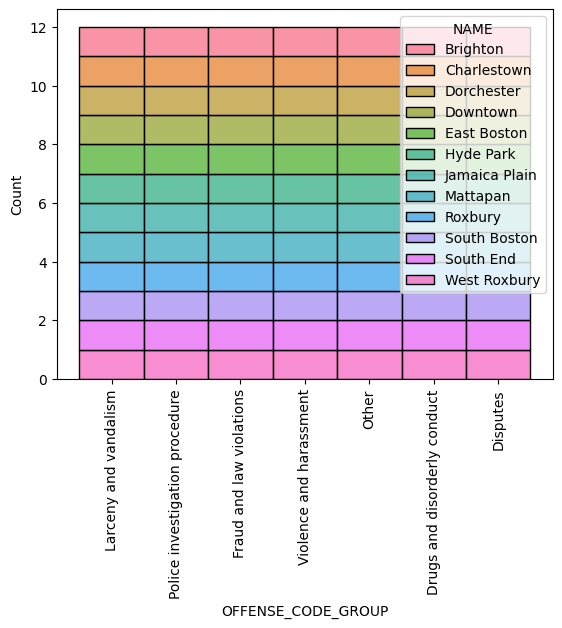

In [45]:
group = data.groupby('NAME')
group = group['OFFENSE_CODE_GROUP'].agg(lambda x: x.mode())
group_df = pd.DataFrame(group)

sns.histplot(data=df, x="OFFENSE_CODE_GROUP", hue="NAME", multiple="stack")

# sns.countplot(x="OFFENSE_CODE_GROUP", data=group_df, hue=group_df.index)
plt.xticks(rotation=90);

In [ ]:
sorted(data.OFFENSE_CODE_GROUP.unique())

In [68]:
sorted(data.NAME.unique())

['Brighton',
 'Charlestown',
 'Dorchester',
 'Downtown',
 'East Boston',
 'Hyde Park',
 'Jamaica Plain',
 'Mattapan',
 'Roxbury',
 'South Boston',
 'South End',
 'West Roxbury']

In [127]:
group = data.groupby('NAME')
group = group['OFFENSE_CODE_GROUP'].agg(lambda x: x.mode()).reset_index()
group_df = pd.DataFrame(group).rename(columns={'OFFENSE_CODE_GROUP': 'Most Common Incident Category', 'NAME':'District'})
group_df.set_index('District')

,Most Common Incident Category
District,
Brighton,Larceny and vandalism
Charlestown,Larceny and vandalism
Dorchester,Larceny and vandalism
Downtown,Larceny and vandalism
East Boston,Larceny and vandalism
Hyde Park,Larceny and vandalism
Jamaica Plain,Larceny and vandalism
Mattapan,Police investigation procedure
Roxbury,Larceny and vandalism


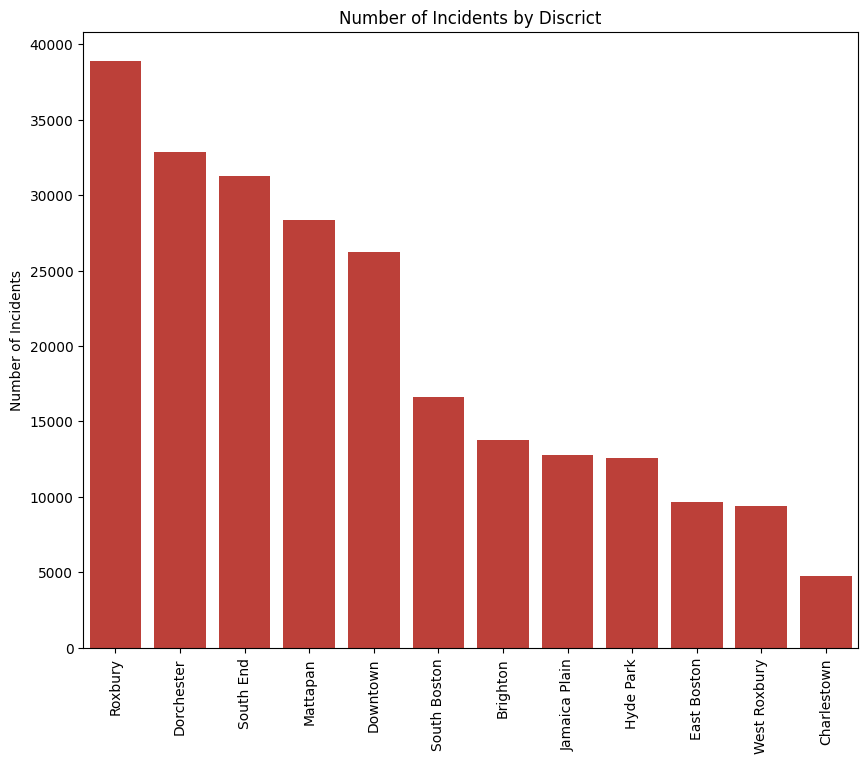

In [169]:


# plt.hist('OFFENSE_CODE_GROUP', data=data, hue='NAME');
plt.figure(figsize=(10,8))
sns.countplot(x="NAME", data=data, order=['Roxbury','Dorchester','South End', 'Mattapan',
                                          'Downtown', 'South Boston', 'Brighton', 'Jamaica Plain', 
                                                                     'Hyde Park', 
                                                                     'East Boston','West Roxbury','Charlestown'],
              color="#D22D23")
              
#               palette=sns.dark_palette("#D22D23", 7))

# sns.countplot(x="NAME", data=data, hue="OFFENSE_CODE_GROUP")
# hue="OFFENSE_CODE_GROUP", hue_order=['Larceny and vandalism', 'Police investigation procedure',
#                          'Violence and harassment', 'Fraud and law violations','Drugs and disorderly conduct', 'Disputes',
#                          'Other'],
# #RdGy

plt.xticks(rotation=90);

plt.title('Number of Incidents by Discrict')
# plt.legend()
plt.xlabel('')
plt.ylabel('Number of Incidents');
# plt.annotate("Regression line", (0,-2), (1,-50), color='green', arrowprops={"arrowstyle":"->", "color":"orange"});

# get current figure and change its size
# fig = plt.gcf()
# fig.set_size_inches(10,10)

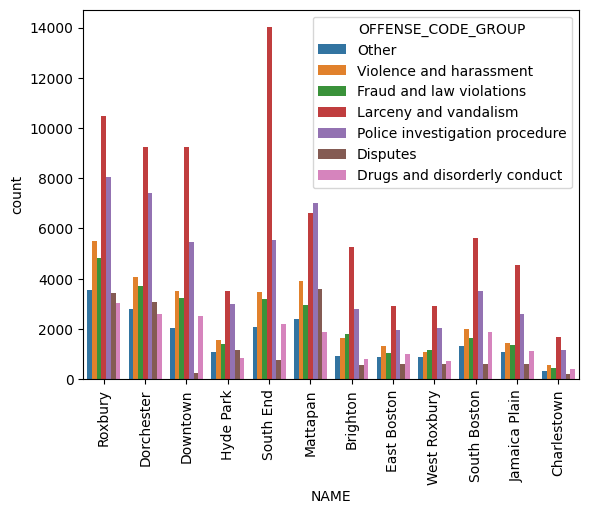

In [25]:
sns.countplot(x="NAME", data=data, hue="OFFENSE_CODE_GROUP")
plt.xticks(rotation=90);

In [82]:
group2 = data.groupby('OFFENSE_CODE_GROUP').count().sort_values('OFFENSE_CODE_GROUP', ascending=False)
group2_df = pd.DataFrame(group2)
group2_df.reset_index()

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,Violence and harassment,30020,30020,30020,30020,30020,30020,30020,30020
1,Police investigation procedure,50520,50520,50520,50520,50520,50520,50520,50520
2,Other,19399,19399,19399,19399,19399,19399,19399,19399
3,Larceny and vandalism,76038,76038,76038,76038,76038,76038,76038,76038
4,Fraud and law violations,26801,26801,26801,26801,26801,26801,26801,26801
5,Drugs and disorderly conduct,19022,19022,19022,19022,19022,19022,19022,19022
6,Disputes,15421,15421,15421,15421,15421,15421,15421,15421


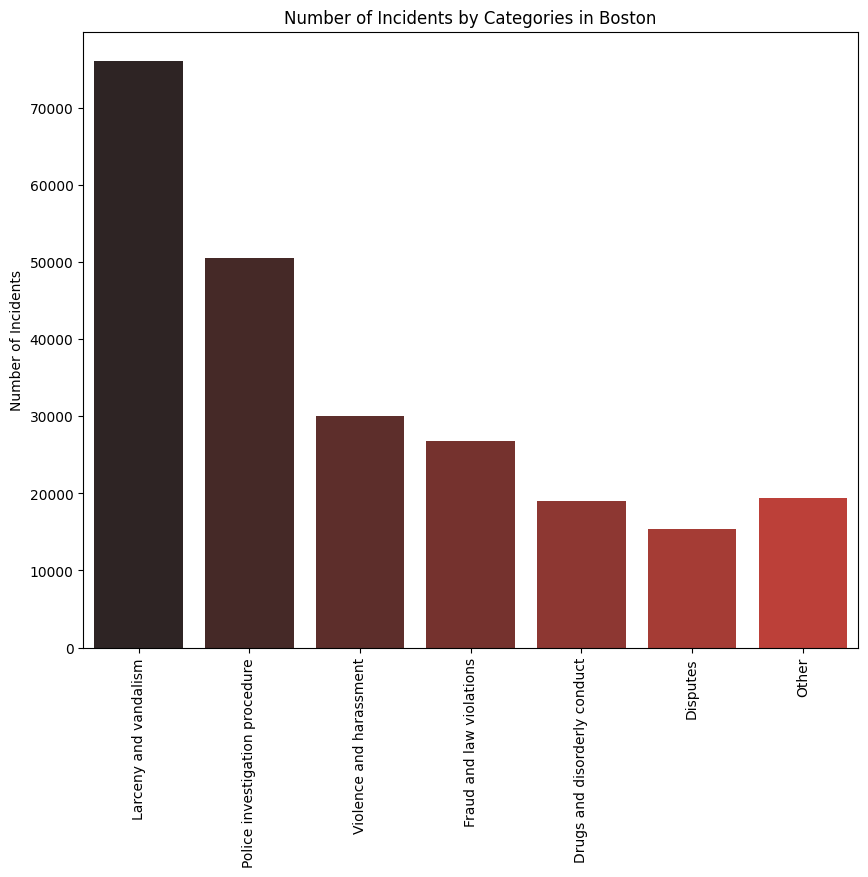

In [159]:
# group2 = data.groupby('OFFENSE_CODE_GROUP').count()
# group2_df = pd.DataFrame(group2).reset_index()

# plt.hist('OFFENSE_CODE_GROUP', data=data, hue='NAME');
plt.figure(figsize=(10,8))
sns.countplot(x="OFFENSE_CODE_GROUP", data=data, order=['Larceny and vandalism', 'Police investigation procedure',
 'Violence and harassment', 'Fraud and law violations','Drugs and disorderly conduct', 'Disputes','Other'], palette=sns.dark_palette("#D22D23", 7))

# #RdGy
# sns.dark_palette("#091f2f")
plt.xticks(rotation=90);

plt.title('Number of Incidents by Categories in Boston')
# plt.legend()
plt.xlabel('')
plt.ylabel('Number of Incidents', rotation=90);
# plt.annotate("Regression line", (0,-2), (1,-50), color='green', arrowprops={"arrowstyle":"->", "color":"orange"});

# get current figure and change its size
# fig = plt.gcf()
# fig.set_size_inches(10,10)

In [134]:
data_backup = data.copy()

In [135]:
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE']).dt.hour

In [137]:
data_backup

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
...,...,...,...,...,...,...,...,...,...
237216,I172049757,Police investigation procedure,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300
237217,I172049757,Drugs and disorderly conduct,0,2018-08-09 18:00:00,42.355216,-71.060129,Charlestown,42.361800,-71.060300
237218,I172027369,Other,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300
237219,I172027369,Police investigation procedure,0,2018-12-12 05:00:00,42.376852,-71.068873,Charlestown,42.361800,-71.060300


In [145]:
data

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,10,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,9,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,15,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,15,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,15,42.312243,-71.075499,Roxbury,42.328894,-71.085359
...,...,...,...,...,...,...,...,...,...
237216,I172049757,Police investigation procedure,0,18,42.355216,-71.060129,Charlestown,42.361800,-71.060300
237217,I172049757,Drugs and disorderly conduct,0,18,42.355216,-71.060129,Charlestown,42.361800,-71.060300
237218,I172027369,Other,0,5,42.376852,-71.068873,Charlestown,42.361800,-71.060300
237219,I172027369,Police investigation procedure,0,5,42.376852,-71.068873,Charlestown,42.361800,-71.060300


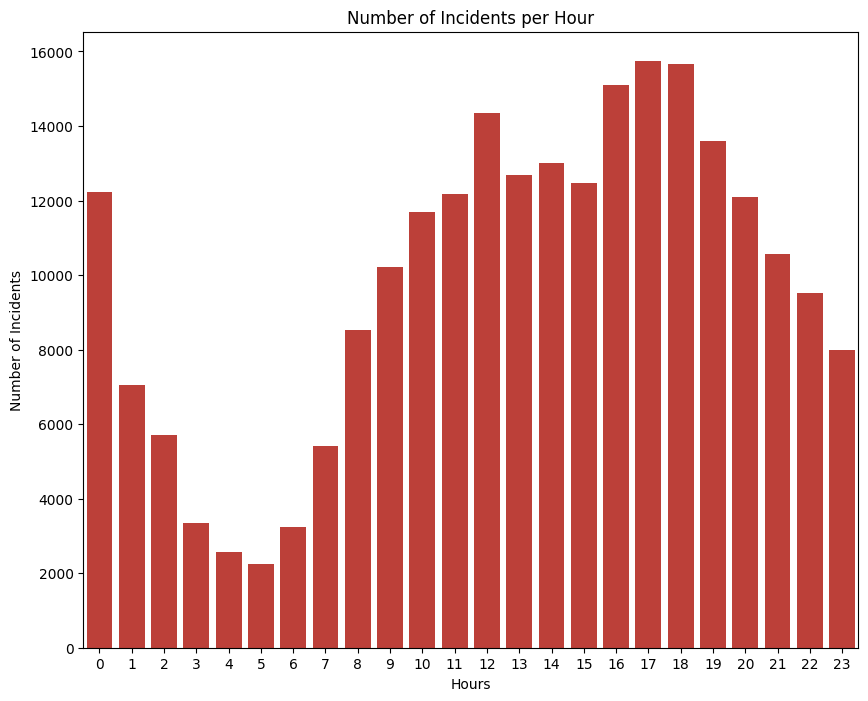

In [147]:
# data['OCCURRED_ON_DATE'].unique()

# group2 = data.groupby('OFFENSE_CODE_GROUP').count()
# group2_df = pd.DataFrame(group2).reset_index()

# plt.hist('OFFENSE_CODE_GROUP', data=data, hue='NAME');
plt.figure(figsize=(10,8))
sns.countplot(x="OCCURRED_ON_DATE", data=data, color="#D22D23", )

# #RdGy
# sns.dark_palette("#091f2f")
# plt.xticks(rotation=90);

plt.title('Number of Incidents per Hour')
# plt.legend()
plt.xlabel('Hours')
plt.ylabel('Number of Incidents', rotation=90);
# plt.annotate("Regression line", (0,-2), (1,-50), color='green', arrowprops={"arrowstyle":"->", "color":"orange"});

# get current figure and change its size
# fig = plt.gcf()
# fig.set_size_inches(10,10)